# Análise de Sentimento de Notícias Financeiras e Previsão de Sentimento


cs07um9r01qrbtrl9dkgcs07um9r01qrbtrl9dl0

In [10]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from transformers import pipeline

# Replace 'YOUR_FMP_API_KEY' with your actual FMP API key
FMP_API_KEY = "uILW67maiy7Oqt3HkNuGBKeNsLmaERte"

# Function to fetch news about a stock using the FMP API
def get_news_from_fmp(stock_symbol, start_date, end_date):
    url = (
        f"https://financialmodelingprep.com/api/v4/article?"
        f'symbol={stock_symbol}&'
        f'from={start_date}&to={end_date}&'
        f'limit=1000&'  # Adjust as needed; max is 1000
        f'apikey={FMP_API_KEY}'
    )
    response = requests.get(url)
    
    if response.status_code == 200:
        news_list = response.json()
        # Format the news data to match the expected structure
        formatted_news_list = []
        for news in news_list:
            news_item = {
                'datetime': news['publishedDate'],
                'headline': news['title'],
                'summary': news['text'] if 'text' in news else ''
            }
            formatted_news_list.append(news_item)
        return formatted_news_list
    else:
        print(f"Error fetching news: {response.status_code}")
        return []

# Initialize the sentiment analysis pipeline with the specified model
sentiment_pipeline = pipeline(
    'sentiment-analysis',
    model='distilbert-base-uncased-finetuned-sst-2-english',
    truncation=True,
    max_length=512
)

# Function to compute the sentiment score for each news article
def compute_sentiment_scores(news_list):
    df = pd.DataFrame(news_list)
    
    # Convert datetime strings to datetime objects
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    # Combine 'headline' and 'summary' for each news article
    df['full_news'] = df['headline'] + ". " + df['summary']
    
    # Perform sentiment analysis on all news articles at once
    news_texts = df['full_news'].tolist()
    results = sentiment_pipeline(news_texts, truncation=True, max_length=512)
    
    # Map sentiment labels to numerical scores (0 to 100)
    sentiment_scores = []
    for result in results:
        label = result['label']
        score = result['score']
        # Map 'NEGATIVE' to 0-50 and 'POSITIVE' to 50-100
        if label == 'NEGATIVE':
            sentiment_score = (1 - score) * 50  # Closer to 0
        else:
            sentiment_score = 50 + (score * 50)  # Closer to 100
        sentiment_scores.append(sentiment_score)
    
    df['sentiment_score'] = sentiment_scores
    return df

# Function to generate the time series of sentiment evaluations
def generate_sentiment_time_series(stock_symbol, start_date_str, end_date_str):
    # Parse the date strings into datetime objects
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d').date()
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d').date()
    
    news_list = get_news_from_fmp(stock_symbol, start_date_str, end_date_str)
    
    if not news_list:
        print(f"No news found for {stock_symbol}")
        return None
    
    df = compute_sentiment_scores(news_list)
    
    # Aggregate sentiment scores by date (daily average)
    sentiment_time_series = df.groupby(df['datetime'].dt.date)['sentiment_score'].mean().reset_index()
    sentiment_time_series.rename(columns={'datetime': 'date', 'sentiment_score': 'average_sentiment'}, inplace=True)
    
    # Convert 'date' back to datetime format
    sentiment_time_series['date'] = pd.to_datetime(sentiment_time_series['date'])
    
    return sentiment_time_series

# Function to plot the sentiment time series
def plot_sentiment_time_series(sentiment_time_series):
    plt.figure(figsize=(12, 6))
    plt.plot(sentiment_time_series['date'], sentiment_time_series['average_sentiment'], marker='o')
    plt.title("Daily Average Sentiment Score")
    plt.xlabel("Date")
    plt.ylabel("Sentiment Score (0-100)")
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    stock_symbol = "AAPL"  # Replace with the stock symbol you want to analyze
    start_date = "2023-01-01"
    end_date = "2023-12-31"
    sentiment_time_series = generate_sentiment_time_series(stock_symbol, start_date, end_date)
    
    if sentiment_time_series is not None:
        print(sentiment_time_series)
        
        # Plot the sentiment time series
        plot_sentiment_time_series(sentiment_time_series)


Error fetching news: 403
No news found for AAPL


In [11]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from transformers import pipeline

# Replace 'YOUR_FMP_API_KEY' with your actual FMP API key
FMP_API_KEY = "uILW67maiy7Oqt3HkNuGBKeNsLmaERte"

# Function to fetch news about a stock using the FMP API
def get_news_from_fmp(stock_symbol, start_date, end_date):
    url = (
        f"https://financialmodelingprep.com/api/v3/stock_news?"
        f"tickers={stock_symbol}&"
        f"limit=1000&"
        f"apikey={FMP_API_KEY}"
    )
    response = requests.get(url)

    if response.status_code == 200:
        news_list = response.json()
        # Format the news data to match the expected structure
        formatted_news_list = []
        for news in news_list:
            news_date = datetime.strptime(news['publishedDate'], '%Y-%m-%d %H:%M:%S').date()
            if start_date <= news_date <= end_date:
                news_item = {
                    'datetime': news['publishedDate'],
                    'headline': news['title'],
                    'summary': news['text'] if 'text' in news else ''
                }
                formatted_news_list.append(news_item)
        return formatted_news_list
    else:
        print(f"Error fetching news: {response.status_code}")
        return []

# Initialize the sentiment analysis pipeline with the specified model
sentiment_pipeline = pipeline(
    'sentiment-analysis',
    model='distilbert-base-uncased-finetuned-sst-2-english',
    truncation=True,
    max_length=512
)

# Function to compute the sentiment score for each news article
def compute_sentiment_scores(news_list):
    df = pd.DataFrame(news_list)

    # Convert datetime strings to datetime objects
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Combine 'headline' and 'summary' for each news article
    df['full_news'] = df['headline'] + ". " + df['summary']

    # Perform sentiment analysis on all news articles at once
    news_texts = df['full_news'].tolist()
    results = sentiment_pipeline(news_texts, truncation=True, max_length=512)

    # Map sentiment labels to numerical scores (0 to 100)
    sentiment_scores = []
    for result in results:
        label = result['label']
        score = result['score']
        # Map 'NEGATIVE' to 0-50 and 'POSITIVE' to 50-100
        if label == 'NEGATIVE':
            sentiment_score = (1 - score) * 50  # Closer to 0
        else:
            sentiment_score = 50 + (score * 50)  # Closer to 100
        sentiment_scores.append(sentiment_score)

    df['sentiment_score'] = sentiment_scores
    return df

# Function to generate the time series of sentiment evaluations
def generate_sentiment_time_series(stock_symbol, start_date_str, end_date_str):
    # Parse the date strings into datetime objects
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d').date()
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d').date()

    news_list = get_news_from_fmp(stock_symbol, start_date, end_date)

    if not news_list:
        print(f"No news found for {stock_symbol}")
        return None

    df = compute_sentiment_scores(news_list)

    # Aggregate sentiment scores by date (daily average)
    sentiment_time_series = df.groupby(df['datetime'].dt.date)['sentiment_score'].mean().reset_index()
    sentiment_time_series.rename(columns={'datetime': 'date', 'sentiment_score': 'average_sentiment'}, inplace=True)

    # Convert 'date' back to datetime format
    sentiment_time_series['date'] = pd.to_datetime(sentiment_time_series['date'])

    return sentiment_time_series

# Function to plot the sentiment time series
def plot_sentiment_time_series(sentiment_time_series):
    plt.figure(figsize=(12, 6))
    plt.plot(sentiment_time_series['date'], sentiment_time_series['average_sentiment'], marker='o')
    plt.title("Daily Average Sentiment Score")
    plt.xlabel("Date")
    plt.ylabel("Sentiment Score (0-100)")
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    stock_symbol = "AAPL"  # Replace with the stock symbol you want to analyze
    start_date = "2023-01-01"
    end_date = "2023-12-31"
    sentiment_time_series = generate_sentiment_time_series(stock_symbol, start_date, end_date)

    if sentiment_time_series is not None:
        print(sentiment_time_series)

        # Plot the sentiment time series
        plot_sentiment_time_series(sentiment_time_series)


Error fetching news: 403
No news found for AAPL


e8369d085a117e4020150128116bffcc

Aggregated Sentiment Time Series:
        date  average_sentiment
0 2024-09-09          30.506751
1 2024-09-10          29.015476
2 2024-09-11           0.019863
3 2024-09-22           0.202873
4 2024-09-23          99.327412

Detailed DataFrame with Articles and Sentiment Scores:
                    datetime  \
0  2024-09-23 04:11:22+00:00   
1  2024-09-22 09:25:00+00:00   
2  2024-09-11 16:34:51+00:00   
3  2024-09-10 18:20:05+00:00   
4  2024-09-10 12:24:27+00:00   
..                       ...   
95 2024-09-10 12:15:16+00:00   
96 2024-09-10 11:43:30+00:00   
97 2024-09-09 20:38:06+00:00   
98 2024-09-09 19:49:00+00:00   
99 2024-09-09 05:32:45+00:00   

                                             headline  \
0   Strong iPhone 16 Demand Justifies Buy Rating f...   
1   Apple Stock: Risk From Trifold Smartphone Mark...   
2   Apple Upstaged By Huawei. No Showtime For Glow...   
3   Apple hurts hearing aid stocks on AirPods upgr...   
4   Apple event seen largely 'as expected' by Wa

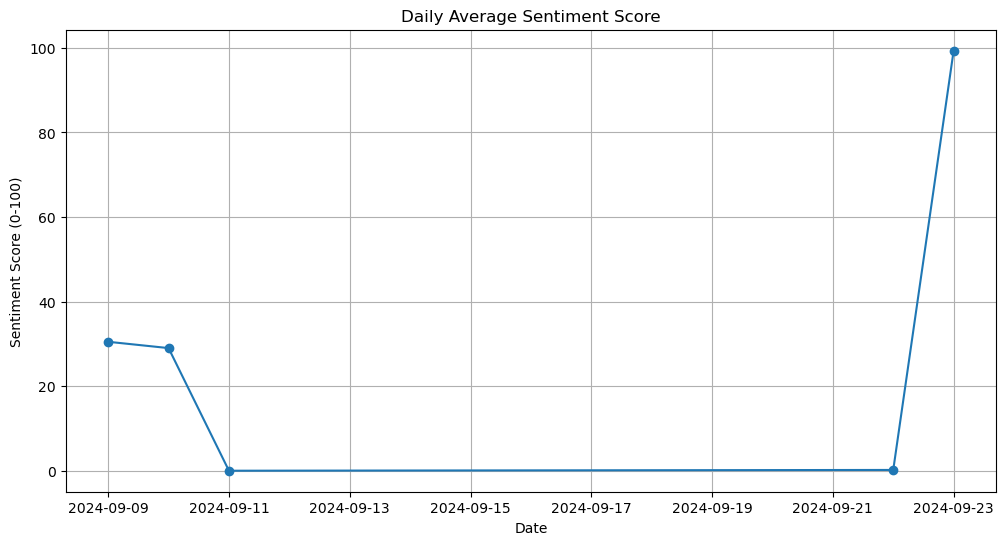

In [14]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from transformers import pipeline
import time  # Import time for sleep

# Replace 'YOUR_GNEWS_API_KEY' with your actual GNews API key
GNEWS_API_KEY = "e8369d085a117e4020150128116bffcc"

# Function to fetch news about a stock using the GNews API
def get_news_from_gnews(stock_symbol, start_date, end_date):
    news_list = []
    page = 1
    max_pages = 10  # Limit the number of pages to avoid exceeding API limits

    # GNews API parameters
    params = {
        'q': stock_symbol,
        'from': start_date,
        'to': end_date,
        'lang': 'en',
        'country': 'us',
        'max': 100,
        'apikey': GNEWS_API_KEY
    }

    while True:
        params['page'] = page
        url = 'https://gnews.io/api/v4/search'

        response = requests.get(url, params=params)

        if response.status_code == 200:
            data = response.json()
            articles = data.get('articles', [])

            if not articles:
                break  # No more articles to fetch

            for article in articles:
                news_item = {
                    'datetime': article['publishedAt'],
                    'headline': article['title'],
                    'summary': article['description'] or ''
                }
                news_list.append(news_item)

            page += 1

            # Check if we've reached the maximum number of pages
            if page > max_pages:
                break

            # Add a delay between requests to avoid hitting rate limits
            time.sleep(1)  # Sleep for 1 second

        else:
            print(f"Error fetching news: {response.status_code}")
            print(response.text)
            break

    return news_list

# Initialize the sentiment analysis pipeline with the specified model
sentiment_pipeline = pipeline(
    'sentiment-analysis',
    model='distilbert-base-uncased-finetuned-sst-2-english',
    truncation=True,
    max_length=512
)

# Function to compute the sentiment score for each news article
def compute_sentiment_scores(news_list):
    df = pd.DataFrame(news_list)

    # Convert datetime strings to datetime objects
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Combine 'headline' and 'summary' for each news article
    df['full_news'] = df['headline'] + ". " + df['summary']

    # Perform sentiment analysis on all news articles at once
    news_texts = df['full_news'].tolist()
    results = sentiment_pipeline(news_texts, truncation=True, max_length=512)

    # Map sentiment labels to numerical scores (0 to 100)
    sentiment_scores = []
    for result in results:
        label = result['label']
        score = result['score']
        # Map 'NEGATIVE' to 0-50 and 'POSITIVE' to 50-100
        if label == 'NEGATIVE':
            sentiment_score = (1 - score) * 50  # Closer to 0
        else:
            sentiment_score = 50 + (score * 50)  # Closer to 100
        sentiment_scores.append(sentiment_score)

    df['sentiment_score'] = sentiment_scores
    return df

# Function to generate the time series of sentiment evaluations
def generate_sentiment_time_series(stock_symbol, start_date_str, end_date_str):
    # Parse the date strings into datetime objects
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d').date()
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d').date()

    news_list = get_news_from_gnews(stock_symbol, start_date_str, end_date_str)

    if not news_list:
        print(f"No news found for {stock_symbol}")
        return None, None  # Return None for both df and sentiment_time_series

    df = compute_sentiment_scores(news_list)

    # Aggregate sentiment scores by date (daily average)
    sentiment_time_series = df.groupby(df['datetime'].dt.date)['sentiment_score'].mean().reset_index()
    sentiment_time_series.rename(columns={'datetime': 'date', 'sentiment_score': 'average_sentiment'}, inplace=True)

    # Convert 'date' back to datetime format
    sentiment_time_series['date'] = pd.to_datetime(sentiment_time_series['date'])

    return df, sentiment_time_series  # Return both df and sentiment_time_series

# Function to plot the sentiment time series
def plot_sentiment_time_series(sentiment_time_series):
    plt.figure(figsize=(12, 6))
    plt.plot(sentiment_time_series['date'], sentiment_time_series['average_sentiment'], marker='o')
    plt.title("Daily Average Sentiment Score")
    plt.xlabel("Date")
    plt.ylabel("Sentiment Score (0-100)")
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    stock_symbol = "AAPL"  # Replace with the stock symbol you want to analyze
    start_date = "2023-01-01"
    end_date = "2023-12-31"
    df, sentiment_time_series = generate_sentiment_time_series(stock_symbol, start_date, end_date)

    if sentiment_time_series is not None:
        # Print the aggregated sentiment time series
        print("Aggregated Sentiment Time Series:")
        print(sentiment_time_series)

        # Print the detailed DataFrame with all articles and their sentiment scores
        print("\nDetailed DataFrame with Articles and Sentiment Scores:")
        print(df)

        # Plot the sentiment time series
        plot_sentiment_time_series(sentiment_time_series)


In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
from transformers import pipeline

# Function to scrape news headlines from Google Finance for S&P 500
def scrape_google_finance_news():
    url = "https://www.google.com/finance/quote/.INX:INDEXSP"  # URL for S&P 500 on Google Finance
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Error fetching news from Google Finance: {response.status_code}")
        return []
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    news_list = []
    news_items = soup.find_all('div', class_='AoCdqe')  # Google Finance news item class (may change over time)

    for item in news_items:
        headline = item.find('div', class_='Yfwt5').text if item.find('div', class_='Yfwt5') else 'No Title'
        summary = item.find('div', class_='NChh6e').text if item.find('div', class_='NChh6e') else 'No Summary'
        date_time = datetime.now()  # Google Finance doesn't provide specific article timestamps, so use current time

        news_item = {
            'datetime': date_time,
            'headline': headline,
            'summary': summary
        }
        news_list.append(news_item)
    
    return news_list

# Initialize the sentiment analysis pipeline with Llama3
# Replace 'llama3_model' with the appropriate Hugging Face model
sentiment_pipeline = pipeline(
    'sentiment-analysis',
    model='distilbert-base-uncased-finetuned-sst-2-english'
)

# Function to compute the sentiment score for each news article
def compute_sentiment_scores(news_list):
    df = pd.DataFrame(news_list)

    # Combine 'headline' and 'summary' for each news article
    df['full_news'] = df['headline'] + ". " + df['summary']

    # Perform sentiment analysis on all news articles at once
    news_texts = df['full_news'].tolist()
    results = sentiment_pipeline(news_texts, truncation=True, max_length=512)

    # Map sentiment labels to numerical scores (0 to 100)
    sentiment_scores = []
    for result in results:
        label = result['label']
        score = result['score']
        # Map 'NEGATIVE' to 0-50 and 'POSITIVE' to 50-100
        if label == 'NEGATIVE':
            sentiment_score = (1 - score) * 50  # Closer to 0
        else:
            sentiment_score = 50 + (score * 50)  # Closer to 100
        sentiment_scores.append(sentiment_score)

    df['sentiment_score'] = sentiment_scores
    return df

# Function to generate the time series of sentiment evaluations
def generate_sentiment_time_series():
    news_list = scrape_google_finance_news()

    if not news_list:
        print(f"No news found for S&P 500 index")
        return None, None  # Return None for both df and sentiment_time_series

    df = compute_sentiment_scores(news_list)

    # Aggregate sentiment scores by date (daily average)
    sentiment_time_series = df.groupby(df['datetime'].dt.date)['sentiment_score'].mean().reset_index()
    sentiment_time_series.rename(columns={'datetime': 'date', 'sentiment_score': 'average_sentiment'}, inplace=True)

    # Convert 'date' back to datetime format
    sentiment_time_series['date'] = pd.to_datetime(sentiment_time_series['date'])

    return df, sentiment_time_series  # Return both df and sentiment_time_series

# Function to plot the sentiment time series
def plot_sentiment_time_series(sentiment_time_series):
    plt.figure(figsize=(12, 6))
    plt.plot(sentiment_time_series['date'], sentiment_time_series['average_sentiment'], marker='o')
    plt.title("Daily Average Sentiment Score for S&P 500 Index (Google Finance News)")
    plt.xlabel("Date")
    plt.ylabel("Sentiment Score (0-100)")
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    df, sentiment_time_series = generate_sentiment_time_series()

    if sentiment_time_series is not None:
        # Print the aggregated sentiment time series
        print("Aggregated Sentiment Time Series for S&P 500 Index (Google Finance News):")
        print(sentiment_time_series)

        # Print the detailed DataFrame with all articles and their sentiment scores
        print("\nDetailed DataFrame with Articles and Sentiment Scores:")
        print(df)

        # Plot the sentiment time series
        plot_sentiment_time_series(sentiment_time_series)


No news found for S&P 500 index
